# 3.5 Gradient Descent

- In this Section we derive the *gradient descent algorithm*, building on our discussion of tangent hyperplanes in Section 3.4.

- You can toggle the code on and off in this presentation via the button below.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# import standard tools
import sys
sys.path.append('../../')
import autograd.numpy as np
import time

# import custom plotting tools
from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();
anime_plotter = optlib.animation_plotter.Visualizer();

# The next three lines are needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## The gradient descent algorithm

- Remember, a general local optimization method looks like

\begin{equation}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} + \alpha \mathbf{d}^{\,k}.
\end{equation}

- Here $\mathbf{d}^{\,k}$ are *descent direction* vectors and $\alpha$ is called the *steplength* parameter.  

- Given what we saw in Section 3.4 we could naturally ask what a local method employing the negative gradient direction at each step might look like, and how it might behave.


- Setting the descent direction $\mathbf{d}^{k} = -\nabla g\left(\mathbf{w}^{k-1}\right)$ in the above formula, such a sequence of steps would then take the form

\begin{equation}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)
\end{equation}


- Because each and every direction is guaranteed to be one of descent, intuitively this seems like a potentially useful instance of local optimization.

- Indeed this is precisely the *gradient descent algorithm*.  


- It is it called *gradient descent* - in employing the (negative) gradient as our descent direction - we are repeatedly *descending* in the *(negative) gradient direction* at each step.  

- Appreciate the power of this descent direction - which is almost literally given to us - over the zero-order methods detailed in the previous Chapter.  


- There we had to *search* to find a descent direction, here calculus provides us not only with a descent direction (without search), but an excellent one to boot. 

- The path taken by gradient descent is illustrated figuratively below for a general single-input function.  


- Beginning at the point $w^0$, we make our first approximation is drawn below as a red dot, with the first order Taylor series approximation drawn in green.  


- Moving in the negative gradient descent direction provided by this approximation we arrive at a point $w^1 = w^0 - \alpha \frac{\partial}{\partial w}g\left(w^0\right)$


- We then repeat this process at $w^1$, moving in the negative gradient direction there, to $w^2 = w^1 - \alpha \frac{\partial}{\partial w}g\left(w^1\right)$, and so forth.

<img src="../../mlrefined_images/math_optimization_images/Fig_2_7.png" width="75%"/>

- Often gradient descent is far better than the zero order approaches discussed in the previous Chapter 


- This is entirely due to the fact that the descent direction here - provided by calculus via the gradient - is universally easier to compute.

- Below we provide the generic pseudo-code and ``Python`` implementation of the gradient descent algorithm which will be used in a variety of examples that follow in this Section.  

### The gradient descent algorithm

<hr style="height:1px;border:none;color:#555;background-color:#555;"/>
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; <strong>input:</strong> function $g$, steplength $\alpha$, maximum number of steps $K$, and initial point $\mathbf{w}^0$ <br/>

<strong>2:</strong>&nbsp;&nbsp; <code>for</code> $\,\,k = 1...K$<br/>

<strong>3:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         $\mathbf{w}^k = \mathbf{w}^{k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)$ <br/>

<strong>4:</strong>&nbsp; <strong>output:</strong> history of weights $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$ and corresponding function evaluations $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$ <br/>

<hr style="height:1px;border:none;color:#555;background-color:#555;"/>
</p>

- How do we set the $\alpha$ parameter in general?  


- There are many ways for choosing $\alpha$ for local optimization (as first discussed in Chapter 2) basic (and most commonly used).


- Indeed popular approaches are precisely those introduced in the (comparatively simpler) context of zero order methods in Section 2.3: that is fixed and diminishing steplegnth choices.  We explore this idea further in a subsection below.

- When does gradient descent stop?  


- Technically (when $\alpha$ is chosen well) the algorithm will *halt near stationary points of a function, typically minima or saddle points*.  


- How do we know this?  By the very form of the gradient descent step itself.  

- Say the step

\begin{equation}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)
\end{equation}

does not move from the prior point $\mathbf{w}^{\,k-1}$ significantly.


- Then this can mean only one thing: *that the direction we are traveling in is vanishing* i.e., $-\nabla g\left(\mathbf{w}^k\right) \approx \mathbf{0}_{N\times 1}$.  



- This is - by definition - a *stationary point* of the function.

## A generic ``Python`` implementation of the gradient descent algorithm

- Below we implement gradient descent as described above.  


- It involves just a few requisite initializations, the computation of the gradient function via e.g., an Automatic Differentiator, and the very simple ``for`` loop.  


- The output is a history of the weights and corresponding cost function values at each step of the gradient descent algorithm.

In [3]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

- Given the input to $g$ is $N$ dimensional a general random initialization - the kind that is often used - can be written as shown below.  


- Here the function `random.randn` produces samples from a standard Normal distribution with mean zero and unit standard deviation.  It is also common to scale such initializations by small constants like e.g., $0.1$. 

In [ ]:
# a common initialization scheme - a random point
w = np.random.randn(N,1)

 #### <span style="color:#a50e3e;">Example. </span>  A convex single input example 

- Below we animate the use of gradient descent to minimize the polynomial function

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right).
\end{equation}


- Here $w_0 = 2.5$ and $\alpha = 1$.

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line.
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# run gradient descent 
w = 2.5; alpha = 1; max_its = 25;
weight_history,cost_history = gradient_descent(g,alpha,max_its,w)

# animate gradient descent applied to minimizing this function
anime_plotter.gradient_descent(g,weight_history,savepath='videos/animation_6.mp4',fps=1)

In [5]:
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_6.mp4" type="video/mp4">
  </video>
""")

#### <span style="color:#a50e3e;">Example. </span> A non-convex single input example

- Now we show the result of running gradient descent several times to minimize the function

\begin{equation}
g(w) = \text{sin}(3w) + 0.1w^2
\end{equation}


- For general non-convex functions like this one, several runs (of any local optimization method) can be necessary to determine points near global minima.

<IPython.core.display.Javascript object>


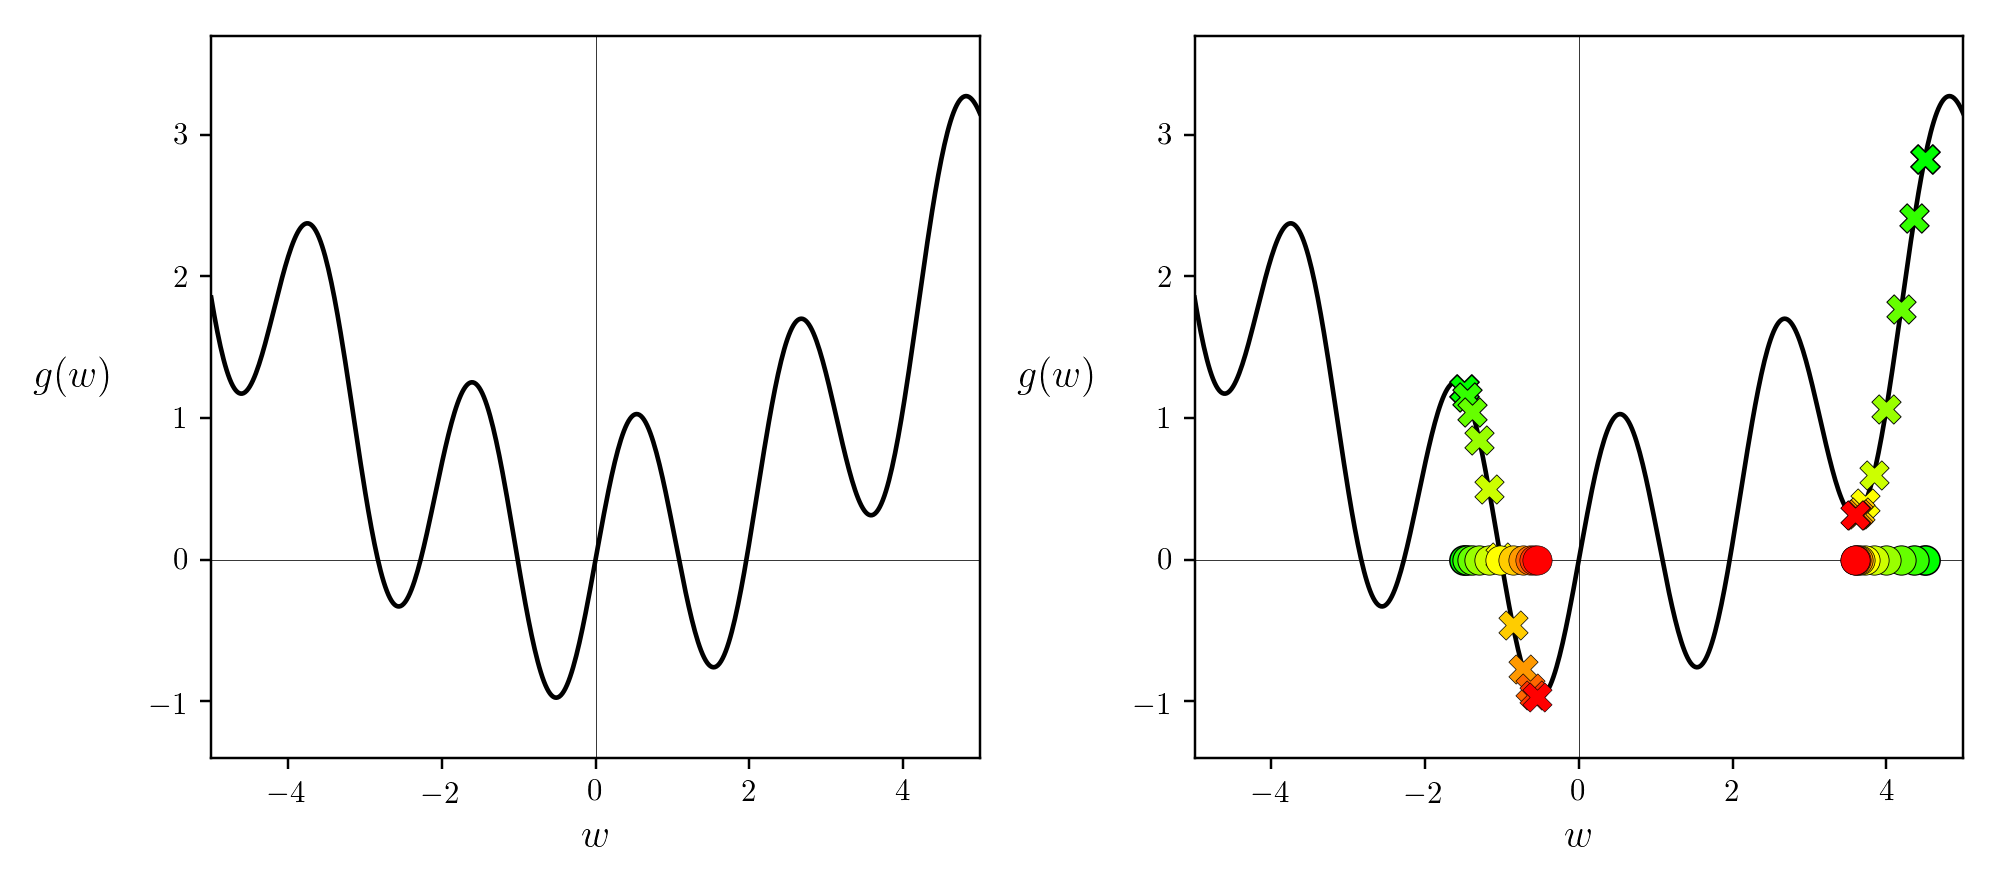

In [14]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(3*w) + 0.1*w**2

# run gradient descent
alpha = 0.05; w = 4.5; max_its = 10;
weight_history_1,cost_history_1 = gradient_descent(g,alpha,max_its,w)

alpha = 0.05; w = -1.5; max_its = 10;
weight_history_2,cost_history_2 = gradient_descent(g,alpha,max_its,w)

# make static plot showcasing each step of this run
static_plotter.single_input_plot(g,[weight_history_1,weight_history_2],[cost_history_1,cost_history_2],wmin = -5,wmax = 5)

- Viewing the *cost function history plot* allows us to view the progress of gradient descent, regardless of the function's input dimension.

<IPython.core.display.Javascript object>


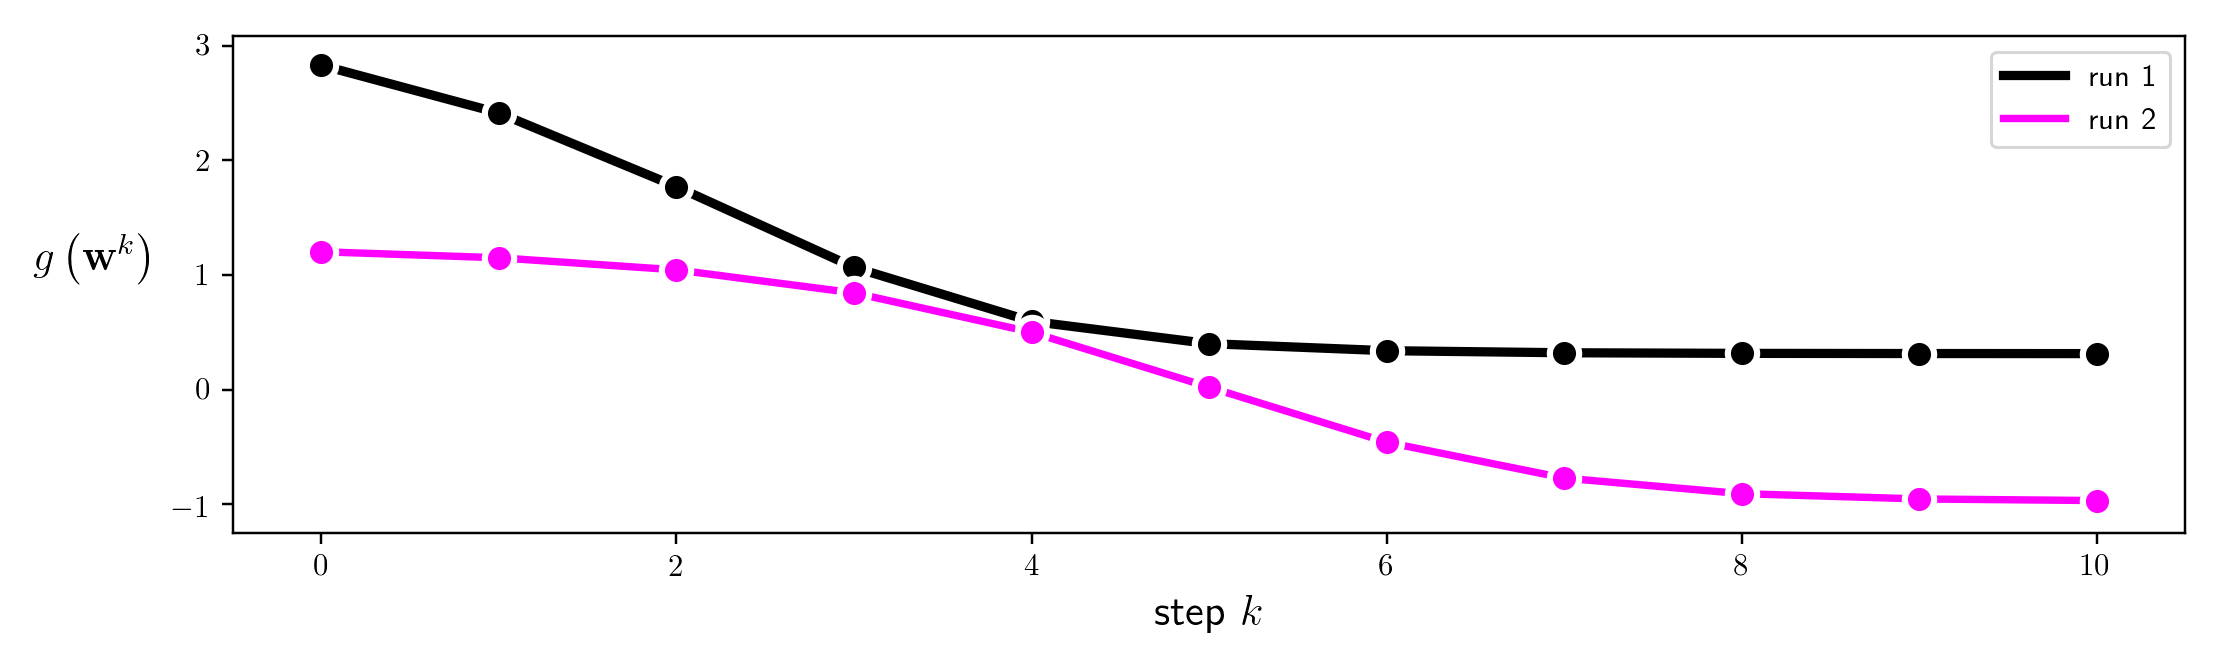

In [15]:
# This code cell will not be shown in the HTML version of this notebook
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history_1,cost_history_2],start = 0,points = True,labels = ['run 1','run 2'])

- As discussed in the prior Chapter, these plots are a valuable debugging tool, as well as a valuable tool for selecting proper values for the steplength $\alpha$. 

#### <span style="color:#a50e3e;">Example. </span>  An example of fixed steplength selection for a single input convex function

- At each step of gradient descent we *always* have a descent direction - this is defined explicitly by the negative gradient itself.


- However whether or not we descend in the function when taking this step depends completely on how far along it we travel, on our choice of the steplength parameter. 


- We illustrate this general principle in the animation below, using $5$ steps of gradient descent.

In [ ]:
# This code cell will not be shown in the HTML version of this notebook
# what function should we play with?  Defined in the next line., nice setting here is g = cos(2*w), w_init = 0.4, alpha_range = np.linspace(2*10**-4,1,200)
g = lambda w: w**2

# create an instance of the visualizer with this function
demo = optlib.grad_descent_steplength_adjuster_2d.visualizer()

# run the visualizer for our chosen input function, initial point, and step length alpha
w_init = -2.5
steplength_range = np.linspace(10**-5,1.5,150)
max_its = 5
demo.animate_it(savepath='videos/animation_7.mp4',w_init = w_init, g = g, steplength_range = steplength_range,max_its = max_its,tracers = 'on',version = 'unnormalized',fps=10)

In [7]:
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src="videos/animation_7.mp4" type="video/mp4">
  </video>
""")